In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import data from the desktop

In [5]:
# Load the dataset from a file
# Replace 'path_to_your_file.csv' with the actual file path


with open("C://Users/DELL/OneDrive/Desktop/Sai University/semester 2/DAV/Assignment 3/IndiaAffectedWaterQualityAreas.csv") as f:
    print(f)
    data = pd.read_csv("C://Users/DELL/OneDrive/Desktop/Sai University/semester 2/DAV/Assignment 3/IndiaAffectedWaterQualityAreas.csv", encoding='cp1252')
    

<_io.TextIOWrapper name='C://Users/DELL/OneDrive/Desktop/Sai University/semester 2/DAV/Assignment 3/IndiaAffectedWaterQualityAreas.csv' mode='r' encoding='cp1252'>


1. Basic data cleaning steps (check for missing data and say how you will deal with it using fillna, change
column names to make them more understandable, etc.)

In [6]:
data.shape# Displays shape of the object

(550242, 8)

In [7]:
# Display the first few rows of the dataframe to understand its structure
print(data.head())

       State Name      District Name      Block Name   Panchayat Name  \
0  ANDHRA PRADESH  EAST GODAVARI(04)  PRATHIPADU(10)    GOKAVARAM(04)   
1  ANDHRA PRADESH  EAST GODAVARI(04)  PRATHIPADU(10)    GOKAVARAM(04)   
2  ANDHRA PRADESH  EAST GODAVARI(04)  PRATHIPADU(10)  GAJJANAPUDI(06)   
3  ANDHRA PRADESH  EAST GODAVARI(04)  PRATHIPADU(10)  GAJJANAPUDI(06)   
4  ANDHRA PRADESH  EAST GODAVARI(04)  PRATHIPADU(10)   CHINTALURU(10)   

           Village Name                   Habitation Name Quality Parameter  \
0        VANTHADA(014 )        VANTHADA(0404410014010400)          Salinity   
1  PANDAVULAPALEM(022 )  PANDAVULAPALEM(0404410022010400)          Fluoride   
2      G. KOTHURU(023 )      G. KOTHURU(0404410023010600)          Salinity   
3     GAJJANAPUDI(029 )     GAJJANAPUDI(0404410029010600)          Salinity   
4      CHINTALURU(028 )      CHINTALURU(0404410028011000)          Salinity   

       Year  
0  1/4/2009  
1  1/4/2009  
2  1/4/2009  
3  1/4/2009  
4  1/4/2009  


In [8]:
# List of columns that are numerical and will be used to calculate the correlation matrix
numeric_columns = [
    'Overall Rating', 
    'Work Life Balance', 
    'Culture and Values', 
    'Diversity and Inclusion', 
    'Career Opportunities',
    # Add other numerical columns here if needed
]

In [9]:
data.columns

Index(['State Name', 'District Name', 'Block Name', 'Panchayat Name',
       'Village Name', 'Habitation Name', 'Quality Parameter', 'Year'],
      dtype='object')

In [10]:
new_column_names = ['State', 'District', 'Block', 'Panchayat', 'Village', 'Habitation', 'QualityParameter', 'Year']

# Assigning new column names
data.columns = new_column_names
new_column_names

['State',
 'District',
 'Block',
 'Panchayat',
 'Village',
 'Habitation',
 'QualityParameter',
 'Year']

In [11]:
data.info()#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550242 entries, 0 to 550241
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   State             550242 non-null  object
 1   District          550242 non-null  object
 2   Block             550242 non-null  object
 3   Panchayat         550242 non-null  object
 4   Village           550242 non-null  object
 5   Habitation        550242 non-null  object
 6   QualityParameter  550242 non-null  object
 7   Year              550242 non-null  object
dtypes: object(8)
memory usage: 33.6+ MB


In [12]:
data.isnull().any()

State               False
District            False
Block               False
Panchayat           False
Village             False
Habitation          False
QualityParameter    False
Year                False
dtype: bool

In [13]:
y=data.isnull().sum()
y

State               0
District            0
Block               0
Panchayat           0
Village             0
Habitation          0
QualityParameter    0
Year                0
dtype: int64

In [15]:
# Extract a specific element from the DataFrame 'data' using row and column indices

# 'iloc' is a method in pandas used for integer-location based indexing for selection by position.
# 'data.iloc[3, 0]' means:
# - '3' refers to the fourth row (indexing starts at 0)
# - '0' refers to the first column

# Therefore, this line extracts the value from the fourth row and the first column of the DataFrame 'data'
element = data.iloc[3, 0]

# 'element' now contains the value located at the fourth row and the first column of 'data'


In [16]:
# Fill missing values in the numerical columns
# 'fillna(element)' fills NaNs with 0; you might choose a different strategy like mean or median
null_mask = data.isnull().any(axis=1)

# Fill null values with a specific value (e.g., 0)
df_filled = data.fillna(element)

# Display the updated DataFrame
print("\nDataFrame after filling null values:")
print(df_filled)

# Display the rows that had null values and were updated
updated_rows = df_filled[null_mask]

print("\nRows that had null values updated:")
print(updated_rows)


DataFrame after filling null values:
                 State           District           Block          Panchayat  \
0       ANDHRA PRADESH  EAST GODAVARI(04)  PRATHIPADU(10)      GOKAVARAM(04)   
1       ANDHRA PRADESH  EAST GODAVARI(04)  PRATHIPADU(10)      GOKAVARAM(04)   
2       ANDHRA PRADESH  EAST GODAVARI(04)  PRATHIPADU(10)    GAJJANAPUDI(06)   
3       ANDHRA PRADESH  EAST GODAVARI(04)  PRATHIPADU(10)    GAJJANAPUDI(06)   
4       ANDHRA PRADESH  EAST GODAVARI(04)  PRATHIPADU(10)     CHINTALURU(10)   
...                ...                ...             ...                ...   
550237           ASSAM             JORHAT       KALIAPANI     CHINTAMONIGARH   
550238           ASSAM             JORHAT       KALIAPANI     CHINTAMONIGARH   
550239           ASSAM             JORHAT       KALIAPANI  TAMULICHIGA  GAON   
550240           ASSAM             JORHAT       KALIAPANI  TAMULICHIGA  GAON   
550241           ASSAM             JORHAT       KALIAPANI  TAMULICHIGA  GAON   

 

In [17]:
#changing the colounms names  for better readability 
# Rename the columns to make them more understandable
data.rename(columns={
    'State Name': 'State',
    'District Name': 'District',
    'Block Name': 'Block',
    'Panchayat Name': 'Panchayat',
    'Village Name': 'Village',
    'Habitation Name': 'Habitation',
    'Quality Parameter': 'QualityParameter',
    'Year': 'Year'
}, inplace=True)


# Display the first few rows of the updated dataframe
data.head()
data

,State,District,Block,Panchayat,Village,Habitation,QualityParameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,1/4/2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,1/4/2009
...,...,...,...,...,...,...,...,...
550237,ASSAM,JORHAT,KALIAPANI,CHINTAMONIGARH,GHARACHOWA HABI GAON,2 NO. BORA - SAIKIA CHUCK,Iron,1/4/2012
550238,ASSAM,JORHAT,KALIAPANI,CHINTAMONIGARH,GHARPHALIA GAON,GHARPHOLIA CHUCK,Iron,1/4/2012
550239,ASSAM,JORHAT,KALIAPANI,TAMULICHIGA GAON,SIMALUGURI GAON,SIMALUGURI BAMUN CHUCK,Iron,1/4/2012
550240,ASSAM,JORHAT,KALIAPANI,TAMULICHIGA GAON,SIMALUGURI GAON,POURUA CHANGMI CHUCK,Iron,1/4/2012


In [18]:
data#Displaying dataset after filling missing values

,State,District,Block,Panchayat,Village,Habitation,QualityParameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,1/4/2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,1/4/2009
...,...,...,...,...,...,...,...,...
550237,ASSAM,JORHAT,KALIAPANI,CHINTAMONIGARH,GHARACHOWA HABI GAON,2 NO. BORA - SAIKIA CHUCK,Iron,1/4/2012
550238,ASSAM,JORHAT,KALIAPANI,CHINTAMONIGARH,GHARPHALIA GAON,GHARPHOLIA CHUCK,Iron,1/4/2012
550239,ASSAM,JORHAT,KALIAPANI,TAMULICHIGA GAON,SIMALUGURI GAON,SIMALUGURI BAMUN CHUCK,Iron,1/4/2012
550240,ASSAM,JORHAT,KALIAPANI,TAMULICHIGA GAON,SIMALUGURI GAON,POURUA CHANGMI CHUCK,Iron,1/4/2012


2. Write code to generate basic statistical data for the given dataset

In [14]:
# Generate summary statistics for numerical columns in the DataFrame 'data'
u = data.describe()

# 'data.describe()' provides statistical summary of numerical columns:
# - Count: Number of non-null values
# - Mean: Average of the values
# - Std: Standard deviation of the values
# - Min: Minimum value
# - 25%: 25th percentile (first quartile)
# - 50%: 50th percentile (median or second quartile)
# - 75%: 75th percentile (third quartile)
# - Max: Maximum value

# Display the summary statistics
u


,State,District,Block,Panchayat,Village,Habitation,QualityParameter,Year
count,550242,550242,550242,550242,550242,550242,550242,550242
unique,27,493,3577,37471,81703,147566,5,4
top,RAJASTHAN,BARMER,BALESAR,RATANPUR,RAMPUR,HARIJAN TOLA,Iron,1/4/2009
freq,131417,43752,8358,797,691,3072,302244,179999


3. Try to infer at least two pieces of information from the data by asking the correct question and coding to
find the answer.



1)How many unique quality parameters are recorded in the dataset, and what are they?

In [19]:
# Extract the unique values from the 'QualityParameter' column in the DataFrame 'data'
# The 'unique()' method returns an array of unique values found in the specified column
unique_quality_parameters = data['QualityParameter'].unique()

# Calculate the number of unique quality parameters
# 'len()' function is used to get the length of the array, which represents the count of unique values
num_unique_quality_parameters = len(unique_quality_parameters)

# Print the unique quality parameters
# This provides a list of all distinct values present in the 'QualityParameter' column
print("Unique Quality Parameters:", unique_quality_parameters)

# Print the number of unique quality parameters
# This displays the count of distinct values found in the 'QualityParameter' column
print("Number of Unique Quality Parameters:", num_unique_quality_parameters)


Unique Quality Parameters: ['Salinity' 'Fluoride' 'Iron' 'Arsenic' 'Nitrate']
Number of Unique Quality Parameters: 5


2)How many records are there for each quality parameter?

In [20]:
# Counting the number of records for each quality parameter
quality_parameter_counts = data['QualityParameter'].value_counts()

# Printing the number of records for each quality parameter
print("Number of Records for Each QualityParameter:")
print(quality_parameter_counts)


Number of Records for Each QualityParameter:
QualityParameter
Iron        302244
Salinity    108923
Fluoride    101041
Arsenic      25705
Nitrate      12329
Name: count, dtype: int64


4)Visualise at least two interesting inferences, or information that you may want to draw attention to, from
the chosen dataset using your favourite visualisation tool.

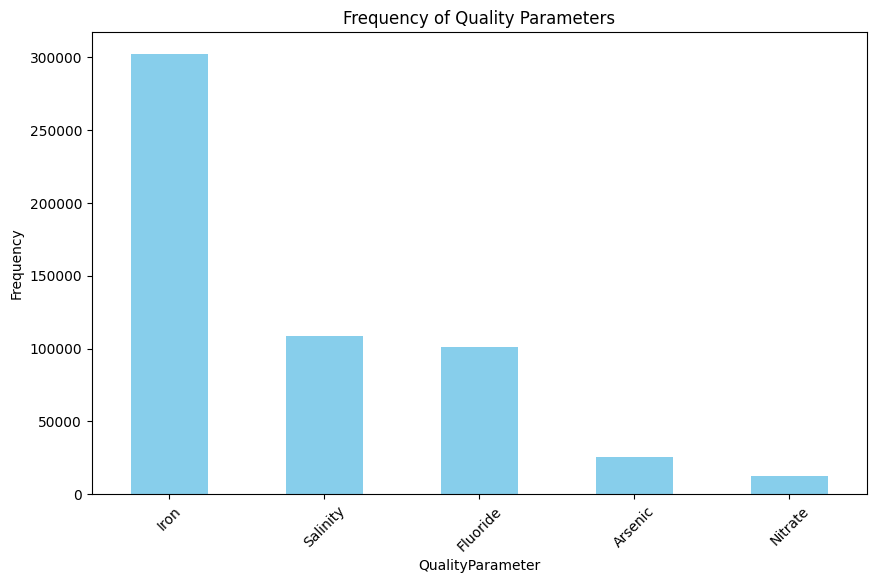

In [21]:
# Calculating the frequency of each quality parameter
quality_counts = data['QualityParameter'].value_counts()

# Setting up the plot
plt.figure(figsize=(10, 6))  # Defining the size of the plot figure
quality_counts.plot(kind='bar', color='skyblue')  # Creating a bar plot with skyblue bars

# Adding plot titles and labels
plt.title('Frequency of Quality Parameters')  # Setting the title of the plot
plt.xlabel('QualityParameter')  # Labeling the x-axis
plt.ylabel('Frequency')  # Labeling the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability

# Displaying the plot
plt.show()


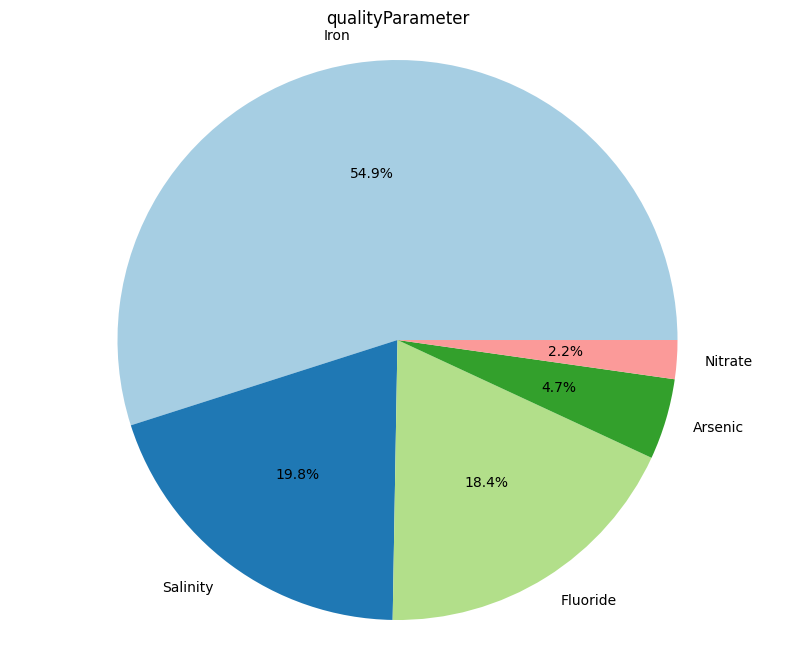

In [22]:
# Calculating the frequency of each quality parameter
quality_counts = data['QualityParameter'].value_counts()

# Setting up the plot
plt.figure(figsize=(10, 8))  # Defining the size of the plot figure

# Creating the pie chart
plt.pie(quality_counts,                 # Data values for the pie chart
        labels=quality_counts.index,    # Labels for each slice of the pie chart
        autopct='%1.1f%%',              # Display format for autopct (percentage format)
        colors=plt.cm.Paired.colors)    # Colors for each slice of the pie chart

# Adding plot title
plt.title('qualityParameter')  # Setting the title of the plot

# Ensuring the pie chart is circular
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Displaying the plot
plt.show()
